# Introduction

This is a story of my quest to learn some data science and machine learning. It is not a nobel or heroic story, however for the benifit of the enjoyment of the reader I will try me best to phrase it as though it were. After learning some basics of machine learning and some of the tools of the trade. I set out on a quest to find a beast to slay with my new found weapon. As opposed to the mythology where it seems there is always a dragon ravaging a conviently placed near by town, I found that intresting data sets were much harder to come by, my first few days where spend waiding through mountians of shit. I was not feeling particualy heroic until I remembers the fifth labor of Herculies, cleaning up King Augeas' stables. Perhaps a data sceintiest of mythalogical porportions could have done the metaphorical equivlent of rerouting a river. However for those of us not blessed with the good fortune of being spawned by a god, we must start our lives as lowely stable hands and waid though the mountins of shit by hand. And thus I began my first labor skipping of cleaning the shit (personally I am glad to have skipped Hercules first five as I am not sure how I would have faired in a battle against a hydra).

I started just looking at publicly provided goverment data. In particular I was intrested in education data since I grew up with two parents as teachers and have been in school of some kind for a very very long time. Next I turned towards other hobbies, computer games. First I looked at hearthstone. While I was able to find some data it was again fairly restricted. As large compinnies dont tend to be free with their data, at least not with people in my tax bracket, all the data had been collect by a small group of players using image capture software and thus was quite limited.
## Kingdom of Loathing
So I turned to a much smaller game that allows bots and is known to be much more open with their data, Kingdom of loathing. Kingdom of Loathing is an absurdist almost text based game (the text is renforced with picture but they keep them selves to stick figure art) largest based on puns and paraodie. While the humor is what first attracted me game, it was the games suprizing mathematical depth that kept me playing. The entire game could be viewed on one large optimization problem. Is it best to kill the boner dragon early and secure his plunder or is it better to come back latter when you can do it faster because your faries are better dancers? The question is accually non-trivial as its solution is tied up in a web of many similiar rediculus sounding questions. While devoloping an AI that can play KoL has long been something I have been intrested in the project is far to large in scope so I will focus on something more managable, the meat market. In KoL players can trade items using the in game currency meat, why it is meat only god and Jick (the creator of the game) know, and whether god knowns if stilla  topic of much debate in a catholic church.

Logging in to the Kol wiki I found that they had hourly transaction data for the past year on all items purchased on the in game KoL mall. At last I had found a data set large enough, intrestitng enougth and that even tickled my funny bone. And thus the stables were cleaned. Or so I thought (ominous music, https://www.youtube.com/watch?v=WoS8j3iL3qk).

In [17]:
from Convert_Kol import Convert_Kol
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math
from Kol_Produce_Graphs import Produce_Graphs
from Kol_Histogram import Kol_Histogram
from Mean_SD import Mean_SD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import recall_score, precision_score, f1_score
from types import *
import datetime as dt
import calendar
from itertools import product

I will start by analizing pricing data for the item Mr. Accessory. These items occupy a special place in the KoL economy. Kingdom of Loathing earns it revanue exculsively though selling Mr. Acessories with one Mr. Acessory selling for $10, alternatively people can buy Mr. Acessories on the mall that other players are selling for the in game currency, meat. Every month a new unique item of the month is created that can only be purchased by trading in a Mr. Accessory thus Mr. Accessories enter and leave the game constantly.

# Importing the data and familiarizing myself with the data

Any great warrior knows that his life will often rest with his weapon. Thus is important to keep it clean and to know it ins and outs, from it balance to the feal of its grip. For me my weapon in my data and now that I have pulled my weapon from the stone made of shit I must clean it and learn the feel of it. Else I can not hope to suceed in my quest.

In [2]:
path = os.path.join(os.getcwd(),'mr_A')

In [3]:
Convert_Kol(path,'CSV_Mr_A')#Changes the human readable formate the data was given in to a CSV file

In [4]:
path = os.path.join(os.getcwd(),'CSV_Mr_A.csv')

In [5]:
Mr_A_Data=pd.read_csv(path)
Mr_A_Data.head(10)

,Month,Day,time,Quantity,Cost
0,May,24,15.0,2,26575000.0
1,May,24,15.5,4,27150000.0
2,May,24,16.5,1,27150000.0
3,May,24,18.5,1,27100000.0
4,May,24,19.0,1,27000000.0
5,May,24,19.5,3,26607000.0
6,May,24,20.0,1,26500000.0
7,May,24,20.5,2,26900000.0
8,May,24,21.0,1,26900000.0
9,May,24,21.5,3,27000000.0


Now let look at some simple plots. First the majority of KoL players are in North America and as people tend to play computer games at similiar times of day it is likely there will be some relation between quantity purchases and time of day.

In [6]:
Volumn_Data=Mr_A_Data.iloc[:,2:4]

In [7]:
Volumn_Data = Volumn_Data.groupby('Time').sum()

In [8]:
Volumn_Data['Time']=Volumn_Data.index

In [9]:
Volumn_Data.index.names = ['index']

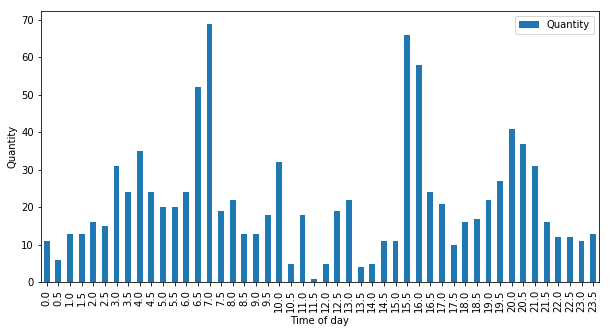

In [10]:
Volumn_Plot = Volumn_Data.plot(x='Time',y='Quantity',kind='bar',figsize=(10,5))
Volumn_Plot.set_ylabel('Quantity')
Volumn_Plot.set_xlabel('Time of day')

We see two clear peaks in this data and one smaller one. So it seems likely that market traffic does vary significatly with time. We will investigate this more later by look at other items to see wether this traffic is spacific to Mr. As or not. THe next question I wish to adress is does this increased traffic affect the costs. If so is there a best time of day for me to purchas (or sell) items in Kol?

In [11]:
Price_Data = Mr_A_Data.iloc[:,2:]

In [12]:
Price_Data['Total Cost']=Price_Data['Quantity']*Price_Data['Cost']
Price_Data=Price_Data.iloc[:,[0,1,3]]
Price_Data = Price_Data.groupby('Time').sum()
Price_Data['Mean Cost']=Price_Data['Total Cost']/Price_Data['Quantity']
Price_Data['Time']=Price_Data.index
Price_Data=Price_Data.iloc[:,2:]
Price_Data['Mean Cost']=Price_Data['Mean Cost']-min(Price_Data['Mean Cost'])

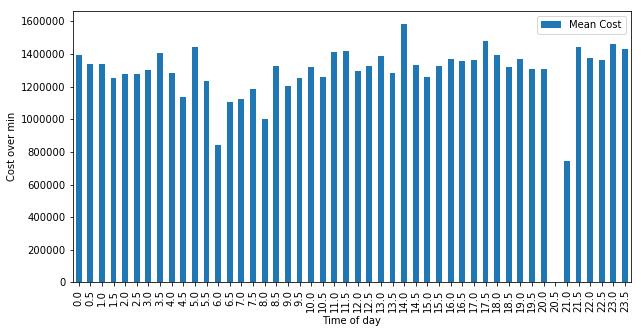

In [13]:
Price_Plot = Price_Data.plot(x='Time',y='Mean Cost',kind='bar',figsize=(10,5))
Price_Plot.set_ylabel('Cost over min')
Price_Plot.set_xlabel('Time of day')

This Graph looks fairly flat so it seems likely that the time of day does not matter.  Perhaps there is something going on at around 8:30 pm, but I will need to look at more data to be sure for now I suspect it is an outlier. Now let us look at a plot of the amount of Mr. As bought at diffrent prices. This will help the wise investor know what is a good price to buy at and what is a good price to sell at and how often one should expect to find these deals.

In [14]:
Price_Freq = Mr_A_Data.iloc[:,3:]
Price_Freq['Cost']=Price_Freq['Cost'].apply(lambda x: math.floor(x/100000))
Price_Freq=Price_Freq.groupby('Cost').sum()
Price_Freq['Cost']=Price_Freq.index

In [15]:
Price_Freq.head(20)

,Quantity,Cost
Cost,,
240.0,3,240.0
250.0,34,250.0
260.0,4,260.0
264.0,7,264.0
265.0,9,265.0
266.0,13,266.0
267.0,19,267.0
268.0,72,268.0
269.0,60,269.0


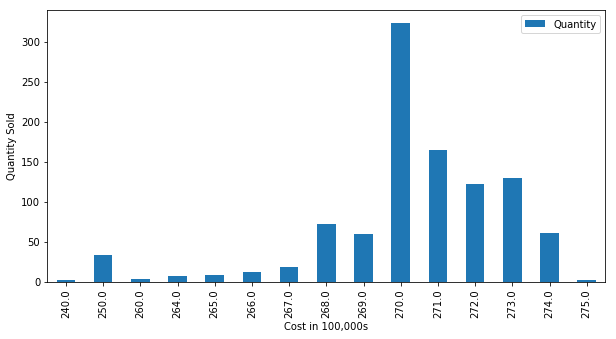

In [16]:
Price_Freq_Plot = Price_Freq.plot(x='Cost',y='Quantity',kind='bar',figsize=(10,5))
Price_Freq_Plot.set_ylabel('Quantity Sold')
Price_Freq_Plot.set_xlabel('Cost in 100,000s')

This seems to follow a left skewed gaussian distribution of some kind. The small peak at 25 milion is of intrest. It could be an outlier however it seems equally possibble that it is people in need of quick cash trying to sell items fast. It could also correspond to a price dip during a certin period of the month (a topic we will look at in the next section). This has the look of a project for another day.

# Monthly Price tends
We will get back to these questions latter after we have imported data on diffrent items. For now let us continue working with the Mr. A data. People Tend to be procrastinators. Investors in Kol have long know how to take advantage of this fact. They believe the price of Mr. As tends to increase near the end of the month as people rush to get the items of the month in before Mr. Store stops selling it. In this section I would like to try to find when is the best time to buy and sell Mr. As with respect to this monthly cycle. For this section we will use a diffrent data set. It has all the data from the past year but the data is stored by the day and not the half hour so it would not be useful in answering the hourly question.

In [11]:
path = os.path.join(os.getcwd(),'Mr_A_Year')
Convert_Kol(path,'CSV_Mr_A_Year')
path = os.path.join(os.getcwd(),'CSV_Mr_A_Year.csv')
Mr_A_Data_Year=pd.read_csv(path)
del Mr_A_Data_Year['Time']
Day_of_Month_Data = Mr_A_Data_Year.loc[:,['Month','Day','Quantity','Cost']]
Day_of_Month_Data=Day_of_Month_Data[Day_of_Month_Data['Month']!='Jun']
Day_of_Month_Data['Total Cost']=Day_of_Month_Data['Cost']*Day_of_Month_Data['Quantity']
Day_of_Month_Data=Day_of_Month_Data.groupby(['Month','Day']).sum()
Day_of_Month_Data['Cost'] = Day_of_Month_Data['Total Cost']/Day_of_Month_Data['Quantity']
Day_of_Month_Data.head()

Quantity          Cost    Total Cost
Month Day                                      
Apr   1          91  2.788960e+07  2.537954e+09
      2          43  2.812491e+07  1.209371e+09
      3          37  2.822159e+07  1.044199e+09
      4          71  2.828683e+07  2.008365e+09
      5          83  2.829281e+07  2.348303e+09

Mr. A Prices can vary from month to month depending on how good the unique item of the month is as seen in the following table.

In [12]:
Monthly_Mean=Day_of_Month_Data.loc[:,['Quantity','Total Cost']]
Monthly_Mean=Monthly_Mean.groupby(level=0).sum()
Monthly_Mean['Mean Cost']=Monthly_Mean['Total Cost']/Monthly_Mean['Quantity']
del Monthly_Mean['Total Cost']
del Monthly_Mean['Quantity']
Monthly_Mean

,Mean Cost
Month,
Apr,2.738603e+07
Aug,2.896892e+07
Dec,2.926327e+07
Feb,2.665823e+07
Jan,2.820967e+07
Jul,2.898261e+07
Mar,2.571004e+07
May,2.714638e+07
Nov,3.029205e+07


This leads me to conjecture that the march item of the month (the 'unpowered Robortender') was not very popular. You will note the june is absent. I have removed it since the data downnloaded was for exactly the last year so the data for the month of june was split between this June and June a year ago. Now lets look at some plots for pricing with respect to day of the month.

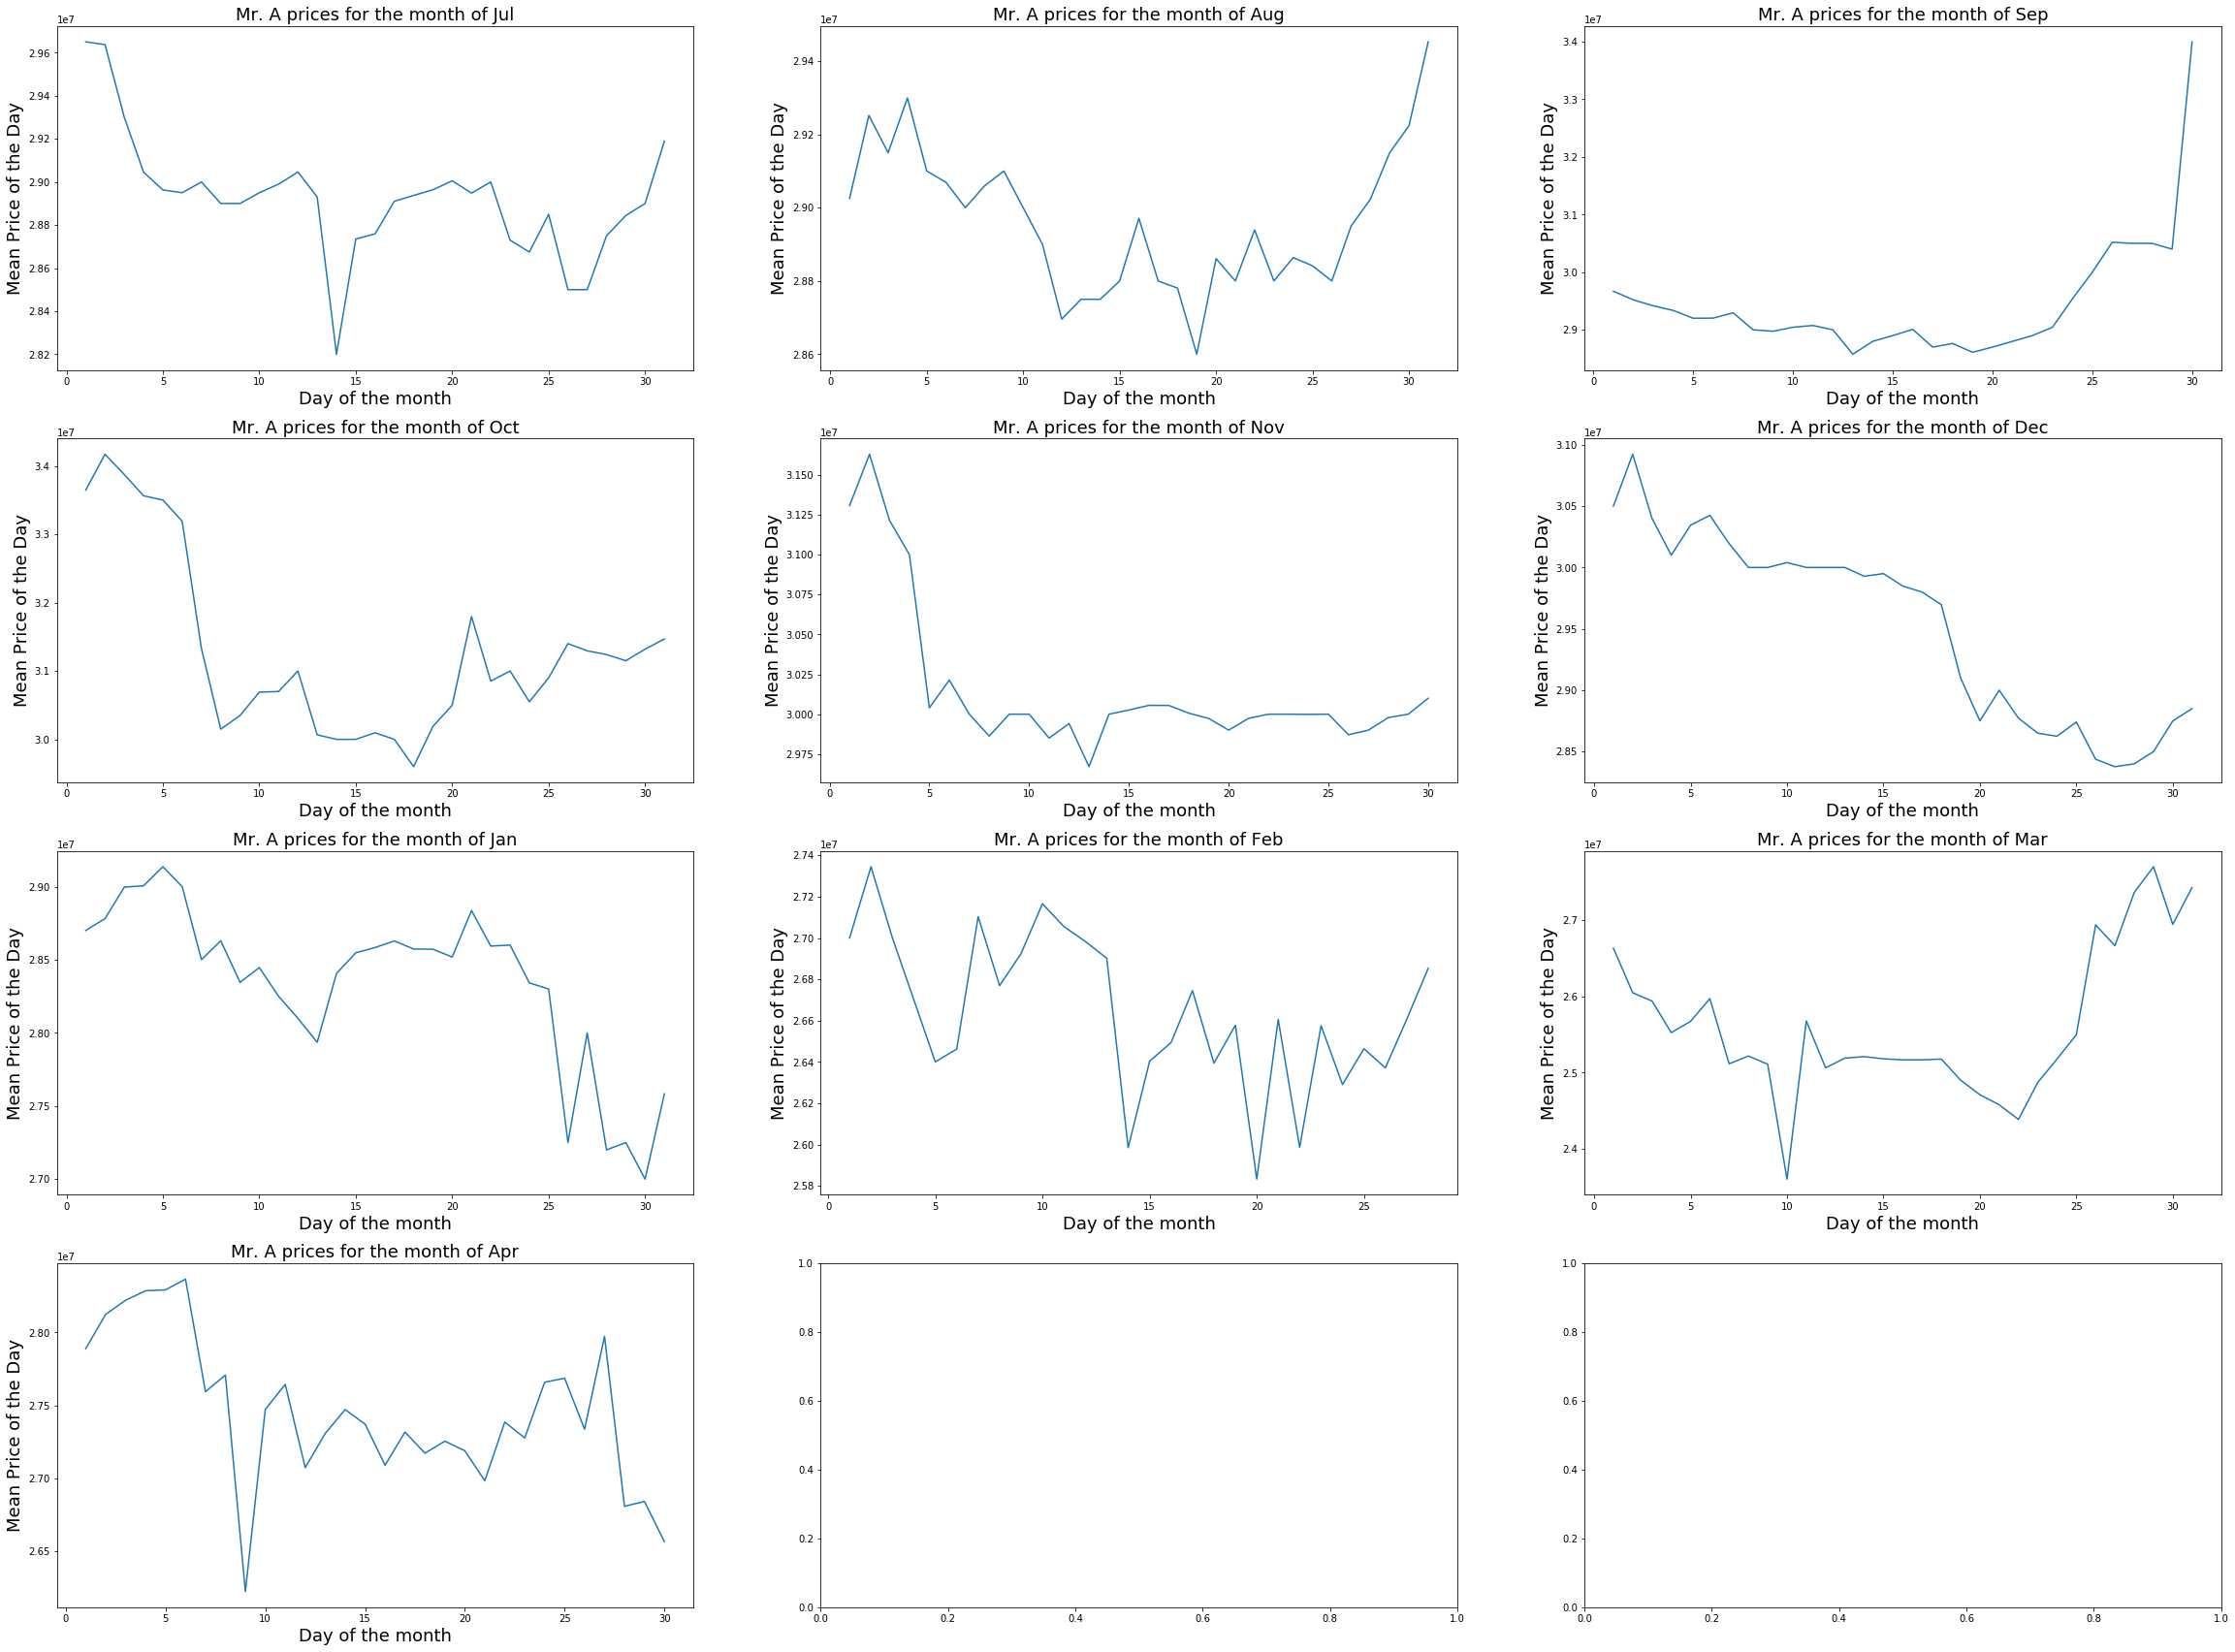

In [13]:
Months = ['Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr']# The websit is missing half the data for the month of may
f, a = plt.subplots(4,3)
f.set_size_inches(40,30)
for i in range(0,10):
    temp_Data=Day_of_Month_Data[Day_of_Month_Data.index.get_level_values(0)==Months[i]]
    a[int(math.floor(i/3)),int(i%3)].plot(np.array(temp_Data.index.get_level_values(1)),np.array(temp_Data['Cost']))
    a[int(math.floor(i/3)),int(i%3)].set_xlabel('Day of the month', fontsize=18)
    a[int(math.floor(i/3)),int(i%3)].set_ylabel('Mean Price of the Day', fontsize=18)
    a[int(math.floor(i/3)),int(i%3)].set_title('Mr. A prices for the month of '+Months[i], fontsize=18)

So it would seem I have human nature wrong. It seems that perhaps I have projected my own flaws on to humanity in general (I have so few of them that this has never happened before). People are not procrastinators, they are in fact early birds!!! Some times there is a spike in cost near the end of the month as I sugested but far more often (always in fact) there is a spike in cost at the begining of the month as people rush in to get their shiny new item.

# Simple Predictions
Now lets try to make some predictions. I notice several trends in how the data behaves at the end of the month, but due to the limited size of out set lets keep it simple, either the price goes up at the end of the month or it does not. Very roughly I woluld say this tends to happen around the 20th day of the month. So I would like to classify wether I should buy Mr. As on the 20th or if I should wait till the 30th. This information would be very useful for directing my investiments. For one if the price decreases clearly I should wait to buy then, but even if the price stays constant the latter I need to commit my meat the better as it means I can keep it invested in other things. Before over thinking a problem it is best to try the simpliest possible thing that has a chance att working. So I will sttart with using a nearest neighbor classification with each month corresponding to a data point and each day being a dimension. First however I will need to get the data in the required form and normalize it else the nearist neighbor apporch may simply end up detectting months with similiar mean cost. An important note when trying to predict the behavior at the end of the month we will obviously not know the monthly mean so for now rather then the true mean I will use the mean of the first 20 days.

In [14]:
Monthly_Mean_Data = Day_of_Month_Data[Day_of_Month_Data.index.get_level_values(1)<=20]
del Monthly_Mean_Data['Cost']
Monthly_Mean_Data = Monthly_Mean_Data.groupby(level=0).sum()
Monthly_Mean_Data['Cost']=Monthly_Mean_Data['Total Cost']/Monthly_Mean_Data['Quantity']
del Monthly_Mean_Data['Quantity']
del Monthly_Mean_Data['Total Cost']
Monthly_Mean_Data.head()

,Cost
Month,
Apr,2.750311e+07
Aug,2.895245e+07
Dec,2.985086e+07
Feb,2.673590e+07
Jan,2.860750e+07


In [15]:
X=[]
Y=[0,0,0,1,1,1,1,0,0,1]
for month in Months:
    X.append((np.array(Day_of_Month_Data[Day_of_Month_Data.index.get_level_values(0)==month]['Cost'][0:20])/Monthly_Mean_Data.at[month,'Cost']).tolist())

Normally one would select a cross validation set randomly but due to the small size of our data we need to be careful as a randomly selected cross validation set could very easily be of entirely one classification and thtus not be representative of the data. Thus I will take me cross validation set to be the months of November, March and Febuary.

In [16]:
train_index = [0,1,2,3,5,6,9] 
cv_index = [4,7,8]
X_train = []
Y_train = []
X_cv = []
Y_cv = []
for i in train_index:
    X_train.append(X[i])
    Y_train.append(Y[i])
for i in cv_index:
    X_cv.append(X[i])
    Y_cv.append(Y[i])

I stop at looking at the four nearest neighbors for now since it does not make sence to look at larger values because there may not even be more then four datra points of a certin class.

In [22]:
for i in range(1,5):
    print('Accuarray for'+ str(i)+'nearest neighbor\nTrain Score')
    print(KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train).score(X_train,Y_train))
    print 'CV Score'
    print(KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train).score(X_cv,Y_cv))

Accuarray for1nearest neighbor
Train Score
1.0
CV Score
0.666666666667
Accuarray for2nearest neighbor
Train Score
1.0
CV Score
0.666666666667
Accuarray for3nearest neighbor
Train Score
0.714285714286
CV Score
0.666666666667
Accuarray for4nearest neighbor
Train Score
0.714285714286
CV Score
0.333333333333


All and all not a great result (perhaps not even better then random guessing but it is hard to tell with such a small cross validation set) but not very suprizing given the limited data. Also the low training score on the latter examples (there is garentied to be no training error with this models for thte 1 and 2 nearest neighbors) indicates that a more complex model might be needed. I will start by trying to find more data however as even with regularization I am very worried about a more comple model overfitting given the small size of my data set.

# Again with Feeling (And more data that helps too, BUT MOSTLY FEELING)!!!!

It would seem we need more data. This time however rather then cleaning the stables my quest took tthe form of navigating a labrinth as I tried to navigate long dead forum posts, links to website that no longer existed. I links that taunted me with their names but when clicked upon simple lead me back to the page I was currently on. No single hero can conqure all villans on their own they need a side kick or better yet a leauge. Bested by the labrinth I turned to my allies at the forums of loathing (the KoL forums) for their assistance. And after one several short days of waiting they pulled through. I now have data all the way back to june 2012 (although there are bits and pieces of it missing and I need to pull from several sources so I still have my work cut out for me).

In [2]:
path = os.path.join(os.getcwd(),'Mr_A_2015')
Convert_Kol(path,'Mr_A_2015')
path = os.path.join(os.getcwd(),'Mr_A_2015.csv')
Mr_A_Data_2015 = pd.read_csv(path)
Mr_A_Data_2015['Year']='2015'
path = os.path.join(os.getcwd(),'Mr_A_2016')
Convert_Kol(path,'Mr_A_2016')
path = os.path.join(os.getcwd(),'Mr_A_2016.csv')
Mr_A_Data_2016 = pd.read_csv(path)
Mr_A_Data_2016['Year']='2016'
path = os.path.join(os.getcwd(),'Mr_A_2017')
Convert_Kol(path,'Mr_A_2017')
path = os.path.join(os.getcwd(),'Mr_A_2017.csv')
Mr_A_Data_2017 = pd.read_csv(path)
Mr_A_Data_2017['Year']='2017'
Mr_A_Data = pd.concat([Mr_A_Data_2015,Mr_A_Data_2016,Mr_A_Data_2017])
del Mr_A_Data['Time']
Mr_A_Data['Cost'] = Mr_A_Data['Cost']*Mr_A_Data['Quantity']
Mr_A_Data['Date'] = Mr_A_Data['Year']+'-'+Mr_A_Data['Month']+'-'+Mr_A_Data['Day'].apply(lambda x: str(x))
Mr_A_Data['Date']=Mr_A_Data['Date'].apply(lambda x:dt.datetime.strptime(x, "%Y-%b-%d"))
del Mr_A_Data['Year']
del Mr_A_Data['Month']
del Mr_A_Data['Day']
Mr_A_Data = Mr_A_Data.groupby('Date').sum()
Mr_A_Data['Cost']=Mr_A_Data['Cost']/Mr_A_Data['Quantity']
del Mr_A_Data['Quantity']
Mr_A_Data['Month']=Mr_A_Data.index
Mr_A_Data['Month']=Mr_A_Data['Month'].apply(lambda x: x.replace(day=1))
Mr_A_Data.head()

,Cost,Month
Date,,
2015-06-08,19654800.0,2015-06-01
2015-06-09,19441300.0,2015-06-01
2015-06-10,19000000.0,2015-06-01
2015-06-11,19637100.0,2015-06-01
2015-06-12,19728900.0,2015-06-01


In [3]:
data = pd.read_csv('MrA.txt', delimiter='\t')
data['Date']=data['Date'].apply(lambda x:dt.datetime.strptime(str(x), "%Y-%m-%d"))
data['Month']=data['Date'].apply(lambda x: x.replace(day=1))
data.index = data['Date']
del data['Date']
data.head()

,Cost,Month
Date,,
2012-06-25,10090000,2012-06-01
2012-06-26,10100000,2012-06-01
2012-06-27,10194000,2012-06-01
2012-06-28,10290000,2012-06-01
2012-06-29,10550000,2012-06-01


Now I need to combin the two data sets.

In [4]:
for date in Mr_A_Data.index:
    if not(date in data.index):
        data.loc[date,:]=Mr_A_Data.loc[date,:]

In [5]:
month_data = data.copy()
month_data['Number of days']=1
month_data['Early Days']=month_data.index.day
month_data['Early Days']=month_data['Early Days'].apply(lambda x: 1 if x<=20 else 0)
month_data['Mean 20']=month_data['Cost']*month_data['Early Days']
month_data = month_data.groupby('Month').sum()
month_data['Mean Cost']=month_data['Cost']/month_data['Number of days']
month_data['Mean 20']=month_data['Mean 20']/month_data['Early Days']
del month_data['Cost']
print month_data
print data.head()

            Number of days  Early Days       Mean 20     Mean Cost
Month                                                             
2012-06-01               6           0           NaN  1.031067e+07
2012-07-01              30          20  1.050777e+07  1.060785e+07
2012-08-01              26          20  1.070760e+07  1.080200e+07
2012-09-01              21          11  1.080682e+07  1.097519e+07
2012-10-01              30          19  1.146189e+07  1.165863e+07
2012-11-01              29          19  1.184995e+07  1.182598e+07
2012-12-01              27          19  1.155305e+07  1.148704e+07
2013-01-01              25          19  1.171030e+07  1.176159e+07
2013-02-01               5           2  1.188500e+07  1.206300e+07
2013-03-01              29          18  1.214783e+07  1.216914e+07
2013-04-01              28          18  1.216408e+07  1.223811e+07
2013-05-01              29          20  1.265285e+07  1.271534e+07
2013-06-01              26          16  1.242031e+07  1.244377

A lot of data seem to be missing. In order to include a month in our training set at the very least we need two things. One is we need a day close to the end of the month to be included in our training set preferably the last day but looking at past examples it seems like if it has risen by the second to last day that is good enougth. Also we would like a large enougth number of points to get a patern from. Thus of the first 20 points I would like at least 18 and I will fill in the missing ones by extending linearly. One thing to point out is that there is a massive increase in the mean in early 2015. At first glace this loked odd to me but I have confirmed that this did indead happen and the data is accurate.

In [6]:
for month in month_data.index:#Removes months where there is no end of month data
    last_day = dt.datetime(year = month.year,month=month.month,day=calendar.monthrange(month.year,month.month)[1])
    next_to_last_day = dt.datetime(year = month.year,month=month.month,day=calendar.monthrange(month.year,month.month)[1]-1)
    if (not (last_day in data.index)):
        if ((next_to_last_day in data.index)):
            data.loc[last_day,:]=data.loc[next_to_last_day,:]
            data.drop(next_to_last_day)
        else:
            data = data[data['Month']!=month]
            month_data = month_data[month_data.index!=month]
month_data.shape

(52, 4)

In [7]:
temp = month_data.copy()
temp = temp[temp['Early Days']<18]
one_day = dt.timedelta(days=1)
for month in temp.index:#Remove months with insufficent data
    data = data[data['Month']!=month]
    month_data = month_data[month_data.index!=month]
print month_data.shape
for (month,day) in product(month_data.index,range(1,21)):#Linearly extend to missing points
    date = month.replace(day=day)
    if not(date in data.index):
        if date+one_day in data.index:
            data.loc[date,:]=[(data.loc[date-one_day,'Cost']+data.loc[date+one_day,'Cost'])/2,month]
        else:
            data.loc[date,:]=[data.loc[date-one_day,'Cost'],month]

(43, 4)


Even more so then before it is important to normalize the data to the monthly means. As before however we will only use the mean of the first 20 days of the month

In [8]:
data['Monthly_Mean']=data['Month'].apply(lambda month: month_data.at[month,'Mean 20'])
data['Normalized Cost']=data['Cost']/data['Monthly_Mean']
data = data.sort_index()
data.head()

,Cost,Month,Monthly_Mean,Normalized Cost
Date,,,,
2012-07-01,10575000.0,2012-07-01,10507772.25,1.006398
2012-07-02,10550000.0,2012-07-01,10507772.25,1.004019
2012-07-03,10640000.0,2012-07-01,10507772.25,1.012584
2012-07-04,10700000.0,2012-07-01,10507772.25,1.018294
2012-07-05,10670000.0,2012-07-01,10507772.25,1.015439


Now to make the training set out data points will be the first 20 days of the month as before. Unlike before we have mroe examples now So I don't simply want to look at graphs to see if the price increased. From the examples before I would say a reasonable price increase is around 100 thousland meat or around %.4 of the value of a mr. A. So I will mark an example as increasing if the price increased by %.3 from the 20th to the end of the month.

In [9]:
inc_amount = .003
X=[]
Y=[]
f = lambda x, y: 0 if y>x*(1+inc_amount) else 1
for first_day in month_data.index:
    last_day = first_day.replace(day=calendar.monthrange(first_day.year,first_day.month)[1])
    day_20 = first_day.replace(day=20)
    X.append(data.loc[first_day:day_20,'Normalized Cost'].tolist())
    Y.append(f(data.at[day_20,'Normalized Cost'],data.at[last_day,'Normalized Cost']))
print 'There are '+str(sum(Y))+' ones in Y and '+str(len(Y)-sum(Y))+' zeros'

There are 31 ones in Y and 12 zeros


Bucause there are around 2.5 times as many 1s as 0s when when do a train test split we need to be careful to make sure the train and test set have approximately the same number of 1s and 0s.

In [10]:
X_train=[]
X_CV=[]
Y_train=[]
Y_CV=[]
spliter = StratifiedShuffleSplit(n_splits=1,test_size=.25)
spliter.split(X,Y)
for train_indexs, CV_indexs in spliter.split(X,Y):
    for train_index in train_indexs:
        X_train.append(X[train_index])
        Y_train.append(Y[train_index])
    for CV_index in CV_indexs:
        X_CV.append(X[CV_index])
        Y_CV.append(Y[CV_index])

In [22]:
#I think something is goign wrong here the percision and recall scores seem to high I will debug tomorow
for i in range(1,13):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
    Y_pred_trian = model.predict(X_train)
    Y_pred_CV = model.predict(X_CV)
    print('Metrics for'+ str(i)+'nearest neighbor----------------------------------')
    print 'Train accucary:' +str(model.score(X_train,Y_train))
    print 'Train Precision:'+str(precision_score(Y_train,Y_pred_trian))
    print 'Train Recall:'+str(recall_score(Y_train,Y_pred_trian))
    print 'Train F1 Score:'+str(f1_score(Y_train,Y_pred_trian))
    print 'CV  accucary:'+str(model.score(X_CV,Y_CV))
    print 'CV Precision:'+str(precision_score(Y_CV,Y_pred_CV))
    print 'CV Recall:'+str(recall_score(Y_CV,Y_pred_CV))
    print 'CV F1 Score:'+str(f1_score(Y_CV,Y_pred_CV))

Metrics for1nearest neighbor----------------------------------
Train accucary:1.0
Train Precision:1.0
Train Recall:1.0
Train F1 Score:1.0
CV  accucary:0.545454545455
CV Precision:0.8
CV Recall:0.5
CV F1 Score:0.615384615385
Metrics for2nearest neighbor----------------------------------
Train accucary:0.59375
Train Precision:1.0
Train Recall:0.434782608696
Train F1 Score:0.606060606061
CV  accucary:0.545454545455
CV Precision:0.8
CV Recall:0.5
CV F1 Score:0.615384615385
Metrics for3nearest neighbor----------------------------------
Train accucary:0.6875
Train Precision:0.76
Train Recall:0.826086956522
Train F1 Score:0.791666666667
CV  accucary:0.636363636364
CV Precision:0.7
CV Recall:0.875
CV F1 Score:0.777777777778
Metrics for4nearest neighbor----------------------------------
Train accucary:0.625
Train Precision:0.739130434783
Train Recall:0.739130434783
Train F1 Score:0.739130434783
CV  accucary:0.545454545455
CV Precision:0.666666666667
CV Recall:0.75
CV F1 Score:0.705882352941
Met

Perhaps a slight imporvement and I am some what more confident in the results now. It is definitly better then random guessing, but it terms of total accuaty it does worse then the model that just assumes it is always going to go up, so it is not much use for investing. Once again the training error is very bad. This leads me to conclude it might be a good idea to try a more complicated model. Intuitively that makes sense there are some very large flaws in the nearest neighbor model.

1) all points are treated approximatly equally so point earlier in the month have as much effect on the model as though latter. It makes sense that days latter in the month should have more effect on the cost at the end of the month.

2) It does not take the slop of a graph into account. If the data for the latter part of two months are just vertical translations of each other then the model might view them as far appart but to our eye the patter looks the same. We can include such feture by looking at linear combinations of fetures such as in an SVM model.

3) When we normalized our model in essense lost data. It no longer knows what the mean value is. The mean value is reflective of how good the current item of the month is, so it seems resonable to suspect that the mean could have some (perhaps even alot) impact on peoples buying habits. I would like to continue to regularize but include the mean (perhaps normalized to the last 6 months or so) as a seperate data point. The problem with this in the nearist neghbor problem is controlling how much influsence the mean has on the model. If we did not normalize it this term would dominate but if it was around the same size as every other entry point it would have the same impact as well. In an SVM the model will automaticly decide this when optimizing the proper coefficents.

# SVM

First lets keep it simple and not include the mean and use a linear kernal. Besicly it will have thte same input as above and I will try a range of value for the regularization paramter C.

In [25]:
#THis block is for testing to see if regularizing the values helps with picking a value of C but at the moment a lot
#in this section needs work was hoping to get to it today but ran into problems that needed to be fixed in earlier sections
S=X
for i in range(0,len(X)):
    for j in range(0,len(X[i])):
        S[i][j]=(X[i][j]-1)/.0003
S_train=[]
S_CV=[]
S_train=[]
S_CV=[]
spliter = StratifiedShuffleSplit(n_splits=1,test_size=.25)
spliter.split(X,Y)
for train_indexs, CV_indexs in spliter.split(X,Y):
    for train_index in train_indexs:
        X_train.append(X[train_index])
        Y_train.append(Y[train_index])
    for CV_index in CV_indexs:
        X_CV.append(X[CV_index])
        Y_CV.append(Y[CV_index])

In [26]:
#Also a work in progress
for C in [.000001,.0001,.001,.01,.1,1,.5,10,100,1000,10000]:
    model = SVC(kernel='linear',C=C).fit(S_train,Y_train)
    print 'C='+str(C)
    print 'Train Score'
    print(model.score(S_train,Y_train))
    print 'CV Score'
    print(model.score(S_CV,Y_CV))

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.

# Long Term Investments
Mr. As can be traded for a unique item of the month that no longer becomes available at the end of the month. Another common investment stratgity if to buy these items and sell them some time latter. Usually on the order of months. However there is a large opertunity cost to this type of investment as it locks up large amounts of meat for a long period of time making it unavailable for other type of investment. So I would now like to look at this type of investment and see how it compares to the stragity presented above. Not sure if I should bother with this section as it will take a lot of work, what do you think?